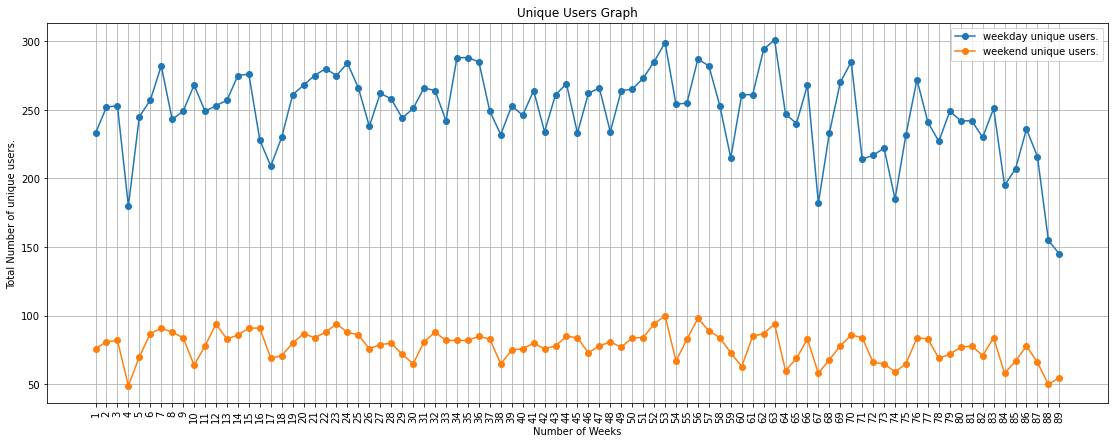

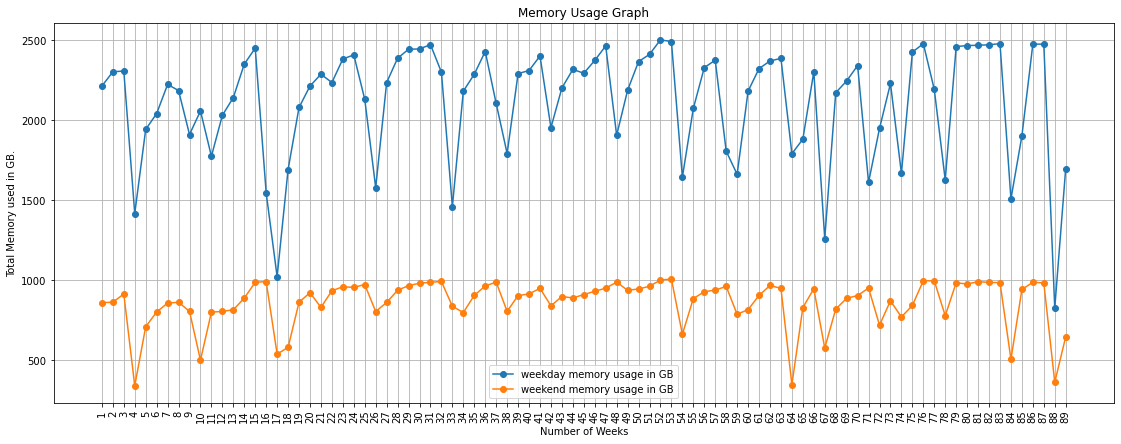

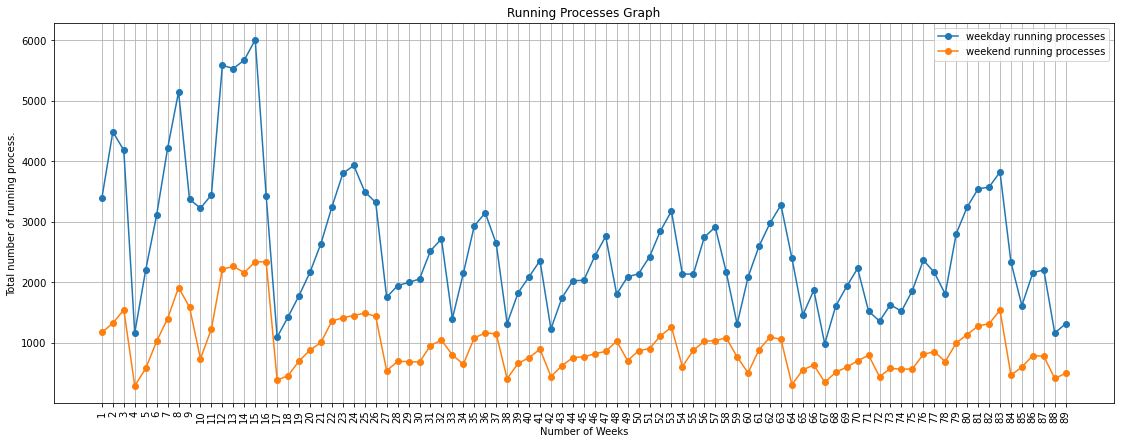

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = '../Data/weekends_holidays - weekends_holidays.csv'
df = pd.read_csv(file)
lis = []
# creating the list of holidays according to the csv-file date-hour column format.
for a,b in df.iterrows():
    date = b[0].split('-')
    months = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
    date = months[date[1]]+date[0]+'_'+date[2]
    lis.append(date)

csv_path = '../SMC-Data_Challenge/csv_files/'
csvs = ['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020',
        'Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020',
        'Jan2021','Feb2021','Mar2021','Apr2021','May2021','Jun2021',
        'Jul2021','Aug2021','Sep2021','Oct2021','Nov2021','Dec2021']

def finding_correlation(arg):
    weekday= []
    weekend = []
    
    for i in csvs:
        # fetching the particular columns needed for the graphical correlation.
        df  = pd.read_csv(csv_path+i+'.csv',usecols=['date-hour','login-node',arg])
        new_df = df.sort_values(by=['date-hour','login-node'])
    
        month = new_df.iloc[-1][0][0:3]
        year = new_df.iloc[-1][0][5:10]
        end = int(new_df.iloc[-1][0][3:5])
        
        wu = []
        weku = []
        
        for j in range(1,end):
            if j <= 9:
                date = month+'0'+ str(j) + year
            else:
                date = month + str(j) + year
        
            abc = new_df[new_df['date-hour'].str.contains(date)]
        
            if date in lis and abc[arg].sum() != 0:
                # if the sum is 0 that means the column of that date is not present in that dataframe.
                # missing files.
                weku.append(abc[arg].sum()//len(abc))
                
                
                
            if date not in lis and abc[arg].sum() != 0: 
                wu.append(abc[arg].sum()//len(abc))
                
                
                
        # appending the values at the end of every month the the main list of weekday v/s weekend usage.
        # values are appended in a week form that is 5 weekdays : 2 weekends/holidays
        counter = 0
        while len(wu[counter*5:]) >= 5 and len(weku[counter*2:])>=2:
            weekday.append(sum(wu[counter*5:counter*5 + 5]))
            weekend.append(sum(weku[counter*2:counter*2 + 2]))
            counter +=1
    # number of weeks to be plotted on x-axis.
    x_values = np.array([ i for i in range(1,len(weekday)+1)])
    
    # the weekday values. 
    w_values = np.array(weekday)
    
    # the weekend/holidays values.
    we_values = np.array(weekend)
    
    # stretched the graph to the x-axis and set a default size for adding new graphs.
    plt.rcParams['figure.figsize']=(19,7)
    plt.xlabel('Number of Weeks')
    
    if arg == 'wusers':
        plt.title('Unique Users Graph')
        plt.ylabel('Total Number of unique users.')
        plt.plot(x_values,w_values,label='weekday unique users.',marker='o')
        plt.plot(x_values,we_values,label='weekend unique users.',marker='o')
        plt.legend()
    elif arg  == 'memory-used':
        plt.title('Memory Usage Graph')
        plt.ylabel('Total Memory used in GB.')
        plt.plot(x_values,w_values,label='weekday memory usage in GB',marker='o')
        plt.plot(x_values,we_values,label='weekend memory usage in GB',marker='o')
        plt.legend()
    elif arg  == 'running-process':
        plt.title('Running Processes Graph')
        plt.ylabel('Total number of running process.')
        plt.plot(x_values,w_values,label='weekday running processes',marker='o')
        plt.plot(x_values,we_values,label='weekend running processes',marker='o')
        plt.legend()
    
    
    
    plt.grid()
    plt.xticks(x_values,rotation=90)
    plt.show()
   
   
    
    
# finding the correlation of following list values.
relation = ['wusers','memory-used','running-process']

for i in relation:
    finding_correlation(i)

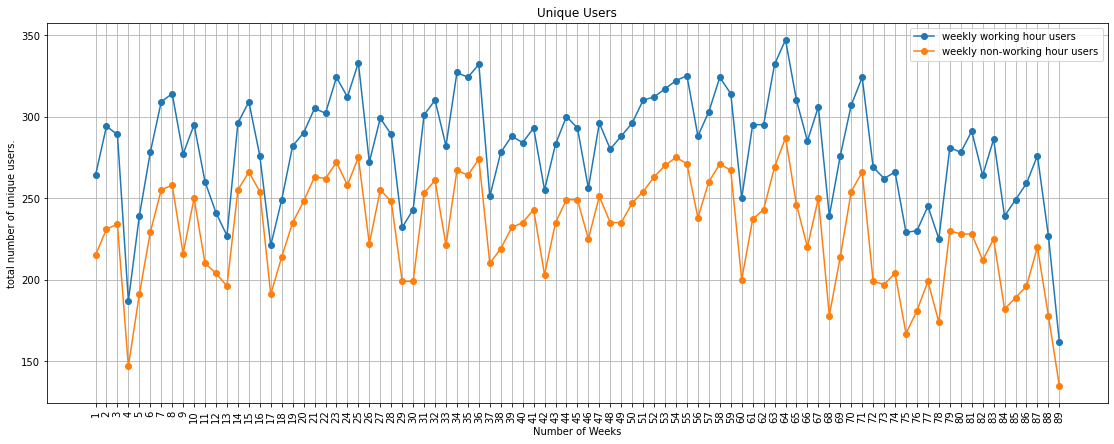

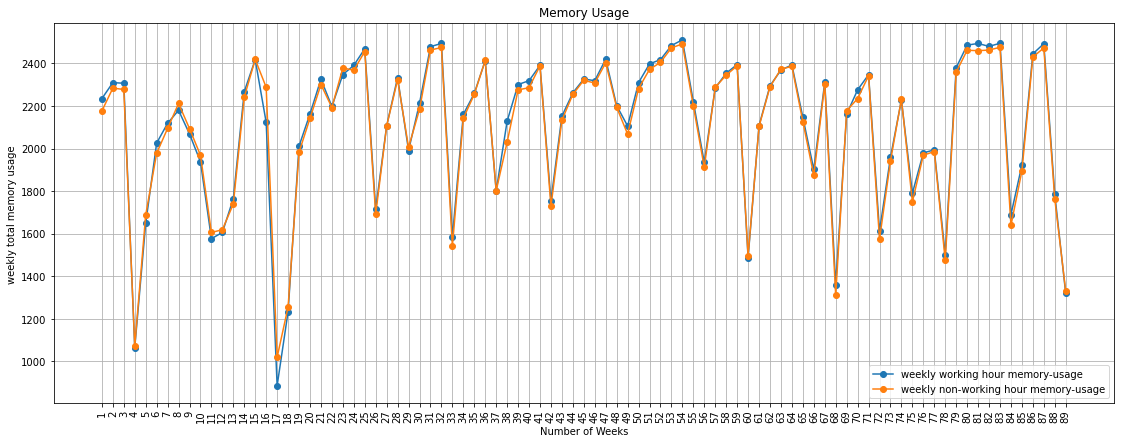

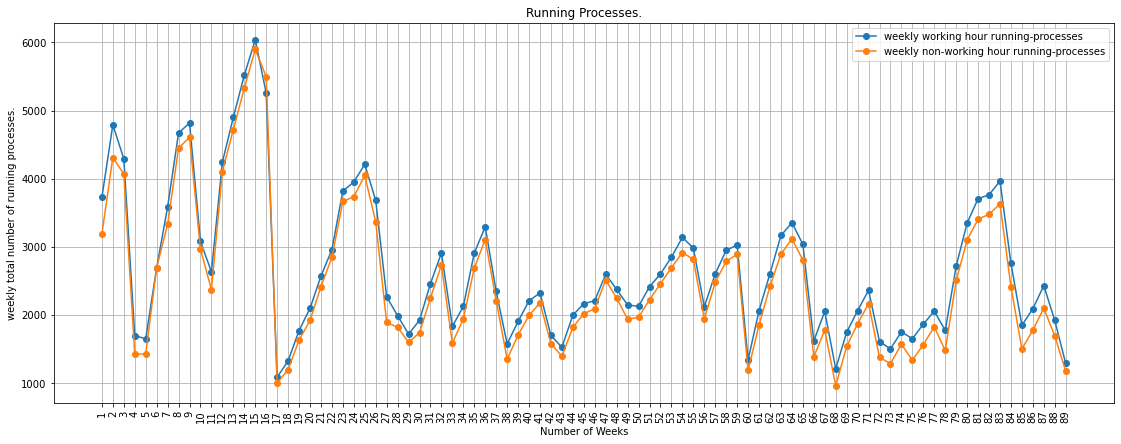

In [3]:
def hourly_correlation(arg):
    
    fiwh = []   # array of average working hour pattern
    finwh = [] # array of average non-working hour pattern
    for i in csvs:
        # fetching the particular columns needed for the graphical correlation.
        df  = pd.read_csv(csv_path+i+'.csv',usecols=['date-hour','login-node',arg])
        new_df = df.sort_values(by=['date-hour','login-node'])
        
        month = new_df.iloc[-1][0][0:3]
        year = new_df.iloc[-1][0][5:10]
        end = int(new_df.iloc[-1][0][3:5])
        
        # fetching values for all the dates not present in the holidays/weekends list.
        
        for j in range(1,end):
            if j <= 9:
                date = month+'0'+ str(j) + year
            else:
                date = month + str(j) + year
            
            if date not in lis:
                
                # getting the particular date data of users,memory,running process
                abc = new_df[new_df['date-hour'].str.contains(date)]
                # considering the data that node is open for 20 hrs.
                wh = []
                nwh = []
                if abc.shape[0] != 0 and len(abc) >= 90:
                    for i in range(0,24):
                        if i <= 9:
                            rslt_df = abc.loc[abc['date-hour'].str.contains('-0'+str(i))]
                            if i == 9 and rslt_df[arg].sum() != 0:
                                wh.append(rslt_df[arg].sum())
                            if i != 9 and rslt_df[arg].sum() != 0:
                                nwh.append(rslt_df[arg].sum())
                            
                        
                        elif 10 <= i <= 16:
                            rslt_df = abc.loc[abc['date-hour'].str.contains('-'+str(i))]
                            if rslt_df[arg].sum() != 0:
                                wh.append(rslt_df[arg].sum())
                            
                        else:
                            
                            rslt_df = abc.loc[abc['date-hour'].str.contains('-'+str(i))]
                            if rslt_df[arg].sum() != 0:
                                nwh.append(rslt_df[arg].sum())
                            
                            
                    
                    fiwh.append(sum(wh)//len(wh))
                    finwh.append(sum(nwh)//len(nwh))
    counter = 0
    y1 = [] # combining 5 working days average for a week
    y2 = [] # combining 5 non-working days  average for a week
    while len(fiwh[counter*5:])> 5:
        y1.append(sum(fiwh[counter*5:counter*5 + 5])//5)
        y2.append(sum(finwh[counter*5:counter*5 + 5])//5)
        counter +=1
        
    xval = [i for i in range(1,len(y1)+1)]
    if arg == 'wusers':
        plt.plot(xval,y1,label='weekly working hour users',marker='o')
        plt.plot(xval,y2,label='weekly non-working hour users',marker='o')
        plt.title('Unique Users')
        plt.ylabel('total number of unique users.')
    elif arg == 'memory-used':
        plt.plot(xval,y1,label='weekly working hour memory-usage',marker='o')
        plt.plot(xval,y2,label='weekly non-working hour memory-usage',marker='o')
        plt.title('Memory Usage')
        plt.ylabel('weekly total memory usage ')
    elif arg == 'running-process':
        plt.plot(xval,y1,label='weekly working hour running-processes',marker='o')
        plt.plot(xval,y2,label='weekly non-working hour running-processes',marker='o')
        plt.title('Running Processes.')
        plt.ylabel('weekly total number of running processes.')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of Weeks')
    plt.xticks(xval,rotation=90)
    plt.show()    
    
        
relation = ['wusers','memory-used','running-process']
for i in relation:
    hourly_correlation(i)